<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week4/2025/week4_bias_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Define the true function
def true_function(x):
    return np.sin(x)

# Simulation parameters
n_train = 25                  # Number of training samples per simulation
n_sim = 500                   # Number of simulation runs
sigma = 0.3                   # Standard deviation of the noise
x_range = np.linspace(0, 2*np.pi, 100)  # Evaluation grid for predictions

# Choose the polynomial degree (try different degrees to see the tradeoff)
degree = 3



In [3]:
# Array to store predictions: shape (n_sim, len(x_range))
predictions = np.zeros((n_sim, len(x_range)))

# Run simulations
for i in range(n_sim):
    # Generate training data uniformly over [0, 2π]
    X_train = np.random.uniform(0, 2*np.pi, n_train)
    y_train = true_function(X_train) + np.random.normal(0, sigma, n_train)

    # Reshape for sklearn (n_samples, 1)
    X_train = X_train.reshape(-1, 1)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)

    # Fit the linear regression model on polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on a fixed evaluation grid
    X_grid = x_range.reshape(-1, 1)
    X_poly_grid = poly.transform(X_grid)
    predictions[i, :] = model.predict(X_poly_grid)




In [17]:
X_poly_train.shape

(25, 4)

In [4]:
# Compute the average prediction (over simulations) at each x
avg_predictions = np.mean(predictions, axis=0)

# Compute the squared bias at each point: (average prediction - true value)^2
true_values = true_function(x_range)
bias_squared = (avg_predictions - true_values)**2

# Compute the variance at each point: variance of predictions over simulations
variance = np.var(predictions, axis=0)

# Total error (MSE) estimated by bias^2 + variance + irreducible noise (sigma^2)
total_error = bias_squared + variance + sigma**2



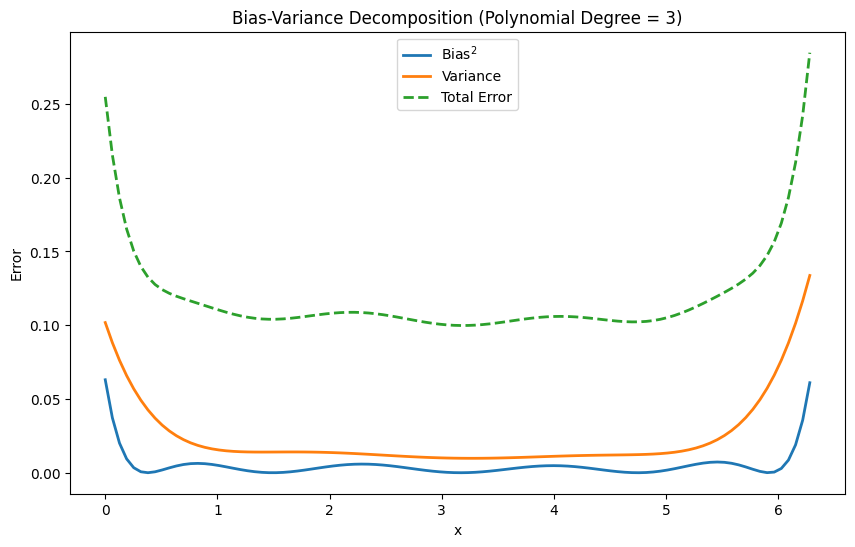

In [5]:
# Plot the bias^2, variance, and total error as functions of x
plt.figure(figsize=(10, 6))
plt.plot(x_range, bias_squared, label='Bias$^2$', linewidth=2)
plt.plot(x_range, variance, label='Variance', linewidth=2)
plt.plot(x_range, total_error, label='Total Error', linewidth=2, linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title(f'Bias-Variance Decomposition (Polynomial Degree = {degree})')
plt.legend()
plt.show()

In [13]:
# Putting it altogether and creating a function - to check with multiple degrees of polynomial (increasing complexity)

def poly_bias_var(degree = 3):

    # Simulation parameters
    n_train = 25                  # Number of training samples per simulation
    n_sim = 500                   # Number of simulation runs
    sigma = 0.3                   # Standard deviation of the noise
    x_range = np.linspace(0, 2*np.pi, 100)  # Evaluation grid for predictions

    # Array to store predictions: shape (n_sim, len(x_range))
    predictions = np.zeros((n_sim, len(x_range)))

    # Run simulations
    for i in range(n_sim):
        # Generate training data uniformly over [0, 2π]
        X_train = np.random.uniform(0, 2*np.pi, n_train)
        y_train = true_function(X_train) + np.random.normal(0, sigma, n_train)

        # Reshape for sklearn (n_samples, 1)
        X_train = X_train.reshape(-1, 1)

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)

        # Fit the linear regression model on polynomial features
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Predict on a fixed evaluation grid
        X_grid = x_range.reshape(-1, 1)
        X_poly_grid = poly.transform(X_grid)
        predictions[i, :] = model.predict(X_poly_grid)

    # Compute the average prediction (over simulations) at each x
    avg_predictions = np.mean(predictions, axis=0)

    # Compute the squared bias at each point: (average prediction - true value)^2
    true_values = true_function(x_range)
    bias_squared = (avg_predictions - true_values)**2

    # Compute the variance at each point: variance of predictions over simulations
    variance = np.var(predictions, axis=0)

    # Total error (MSE) estimated by bias^2 + variance + irreducible noise (sigma^2)
    total_error = bias_squared + variance + sigma**2

    # Plot the bias^2, variance, and total error as functions of x
    plt.figure(figsize=(6, 4))
    plt.plot(x_range, bias_squared, label='Bias$^2$', linewidth=2)
    plt.plot(x_range, variance, label='Variance', linewidth=2)
    plt.plot(x_range, total_error, label='Total Error', linewidth=2, linestyle='--')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.title(f'Bias-Variance Decomposition (Polynomial Degree = {degree})')
    plt.legend()
    plt.show()


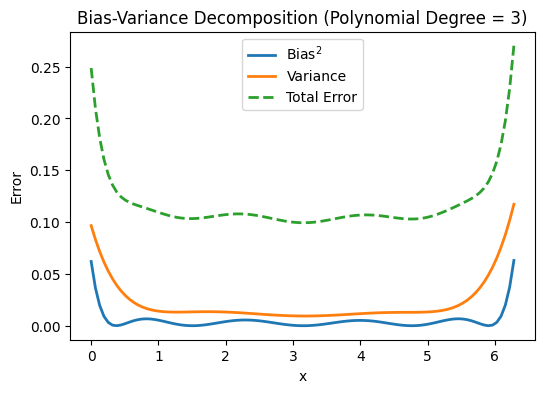

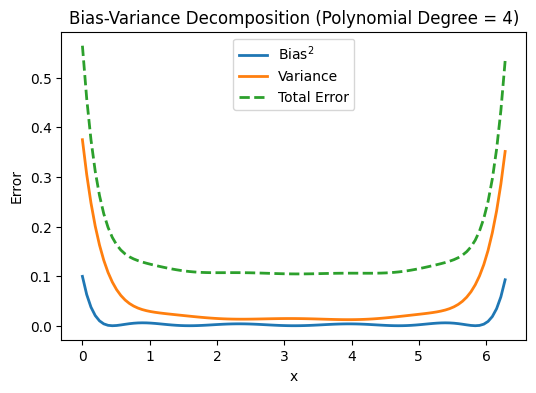

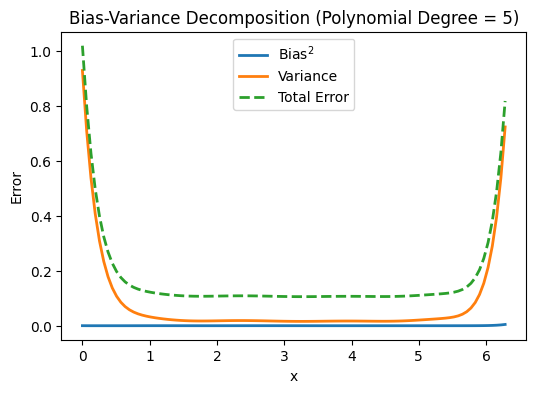

In [14]:
# plotting for different degrees of polynomial
for i in [3, 4, 5]:
  poly_bias_var(degree = i)